In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaledFeatures = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
scaledFeatures

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
dfFeatures = pd.DataFrame(scaledFeatures, columns=df.columns[:-1])

In [11]:
dfFeatures.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.cross_validation import train_test_split

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X = dfFeatures
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
KNN = KNeighborsClassifier()

In [16]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
predictions = KNN.predict(X_test)

In [18]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))
print ('\n')
print(classification_report(y_test, predictions))

[[147  12]
 [ 12 129]]


             precision    recall  f1-score   support

          0       0.92      0.92      0.92       159
          1       0.91      0.91      0.91       141

avg / total       0.92      0.92      0.92       300



In [22]:
errorRate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predictionSamples = knn.predict(X_test)
    errorRate.append(np.mean(predictionSamples != y_test))

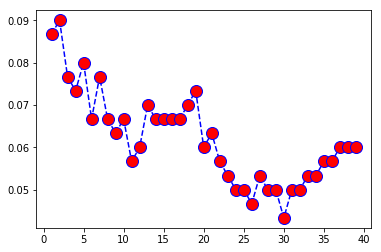

In [23]:
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

In [38]:
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors= 30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
elapsedTime = timeit.default_timer() - startTime
print("elapsed time : ",elapsedTime)

elapsed time :  0.012429314447615525


In [28]:
print(confusion_matrix(y_test, predictions))
print ('\n')
print(classification_report(y_test, predictions))

[[153   6]
 [  7 134]]


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300



<h6>TILL THIS ONLY KNN IS USED WHICH IS PROVIDING 96% ACCURACY WITH COMPUTATION TIME OF 0.0124</h6>

<h6>NOW FROM DOWNWARDS HERE WE HAVE PASSED THE WHOLE DATA TO OUR SCA ALGORITHM</h6> 

In [30]:
data = dfFeatures

In [29]:
import timeit

In [32]:
import random
import math


#SCA IMPLEMENTATION
#begin
#Randomly initialization of each search agents in the population X(t = 1,2,...,m)
a = 1
totalFeatures = len(data.columns[:-1])
r1 = a
t = 0
subsets = []
subsets.append(random.sample(range(1,totalFeatures),3))#initializing first random subset
lowestError = 100 #initializing as highest errorRate for comparison purpose

#Function for checking the new generated subset tempSet is already present in the already initialized subsets or not
def isRepeat(subsets, tempSet):
    #print(subsets)
    #print(tempSet)
    for subset in subsets:
        valueSet = set()
        for feature in subset:
            valueSet.add(feature)
    for feature in tempSet:
        if((feature in valueSet) == False):
            return False
        
#for generating random search agents in the population   
def randomSearchAgents(m, n):
    i = 1
    while i<m:
        X = random.sample(range(1,totalFeatures),n)
        if (isRepeat(subsets, X) == False):
            subsets.append(X)
            i += 1
            
#EQUATION 1
def updateUsingSineCosine(X):
    featureSubset = []
    for j in range(len(X)):
        #print(X[j])
        if(s%2 == 0):
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        else:
            feature = int(X[j] + r1*r2*abs(r3*P[j]-X[j]))
        feature %= totalFeatures
        featureSubset.append(feature)
    return featureSubset


#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X, y):
    X.head()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 17)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    errorRate.append(error)
    return error

#here subsets list contains the list of randomly initialized search agent indices

#INITIALIZE the max numbers of iteration Tmax
Tmax = 6
P = []

while t<Tmax:
    #foreach search agent Xi in the population do
    randomSearchAgents(6, 3)
    '''NOVELTY
        here the feature subsets generated by randomSearchAgents method are not repeatative, 
        if any randomly generated feature subset is already present in the previous generated 
        ones then it is neglected and a new feature subset is generated randomly and checked again.
        This process continues until required number of feature subsets are generated which are all unique
    NOVEL'''
    for subset in subsets:
        #Evaluate Xi via the fitness function. if f(Xi)
        error = trainTestScore(data.iloc[:,subset], df['TARGET CLASS'])
        print("subset : ",subset," error : ",error, " lowest error : ", lowestError)
        #if f(Xi) better than f(P) then
        #Set P = Xi;
        if (error < lowestError):
            P = subset
            lowestError = error
    
    #Update r1 using equation 2
    
    r1 = a - t*(a/Tmax)#equation 2
    
    #Generate randomly new values for r2, r3 and s.
    
    s = int(round(random.random(),1)*10)
    r2 = random.uniform(0.1, 1.0)
    r3 = random.uniform(0.1,2.0)
    #foreach search agent Xi in the population do
    #Update Xi using equation 1.
    for i in range(len(subsets)):
        subsets[i] = updateUsingSineCosine(subsets[i])
    print(P)
    t += 1
#Return P best solution obtained so far.
print("best solution: ",P)

time taken :  0.014380271139499547
subset :  [5, 2, 6]  error :  0.296969696969697  lowest error :  100
time taken :  0.009487755714511895
subset :  [4, 8, 7]  error :  0.23939393939393938  lowest error :  0.296969696969697
time taken :  0.009525092337248957
subset :  [1, 5, 7]  error :  0.2606060606060606  lowest error :  0.23939393939393938
time taken :  0.009463179709672316
subset :  [3, 1, 6]  error :  0.1606060606060606  lowest error :  0.23939393939393938
time taken :  0.009502879409797785
subset :  [9, 4, 7]  error :  0.21515151515151515  lowest error :  0.1606060606060606
time taken :  0.010982165854949572
subset :  [9, 5, 6]  error :  0.19393939393939394  lowest error :  0.1606060606060606
[3, 1, 6]
time taken :  0.009644664053103075
subset :  [7, 2, 8]  error :  0.18181818181818182  lowest error :  0.1606060606060606
time taken :  0.00944238462865421
subset :  [5, 1, 9]  error :  0.14545454545454545  lowest error :  0.1606060606060606
time taken :  0.009255701514968906
subset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,P], df['TARGET CLASS'], test_size = 0.33, random_state = 42)
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
elapsedTime = timeit.default_timer() - startTime
print("time taken : ",elapsedTime)
error = np.mean(prediction != y_test)
print("error : ",error)

time taken :  0.009830401935829514
error :  0.06060606060606061


In [37]:
print(confusion_matrix(y_test, prediction))
print ('\n')
print(classification_report(y_test, prediction))

[[145  10]
 [ 10 165]]


             precision    recall  f1-score   support

          0       0.94      0.94      0.94       155
          1       0.94      0.94      0.94       175

avg / total       0.94      0.94      0.94       330



</h6><b>OUR SCA IS TAKIING VERY REDUCED TIME OF 0.0098 AND PROVIDING ACCURACY OF 94%</b></h6>